In [19]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

%matplotlib inline

In [20]:
#case_id - Case_ID registered in Hospital
#Hospital_code - Unique code for the Hospital
#Hospital_type_code - Unique code for the type of Hospital
#City_Code_Hospital - City Code of the Hospital
#Hospital_region_code - Region Code of the Hospital
#Available Extra Rooms in Hospital - Number of Extra rooms available in the Hospital
#Department - Department overlooking the case
#Ward_Type - Code for the Ward type
#Ward_Facility_Code - Code for the Ward Facility
#Bed Grade - Condition of Bed in the Ward
#patientid - Unique Patient Id
#City_Code_Patient - City Code for the patient
#Type of Admission - Admission Type registered by the Hospital
#Severity of Illness- Severity of the illness recorded at the time of admission
#Visitors with Patient - Number of Visitors with the patient
#Age - Age of the patient
#Admission_Deposit- Deposit at the Admission Time
#Stay- Stay Days by the patient

In [21]:
train= pd.read_csv('health train.csv')
test= pd.read_csv('health_test.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [22]:
display('train' , train.shape, 'test', test.shape)

'train'

(318438, 18)

'test'

(137057, 17)

In [23]:
data= train.append(test, sort= False)
pd.set_option('display.max_columns',None)
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [25]:
## Filter out the numeric and object figures - 
object_features = data.select_dtypes(exclude = [np.number])
print('No of object features : {}'.format(object_features.shape[1]))

numeric_features = data.select_dtypes(include = [np.number])
print('No of numeric features : {}'.format(numeric_features.shape[1]))

No of object features : 9
No of numeric features : 9


In [26]:
#check duplicate records
data.duplicated().sum()

0

In [27]:
data['Admission_Deposit'].describe()

count    455495.000000
mean       4877.434022
std        1084.982089
min        1800.000000
25%        4184.000000
50%        4738.000000
75%        5405.000000
max       11920.000000
Name: Admission_Deposit, dtype: float64

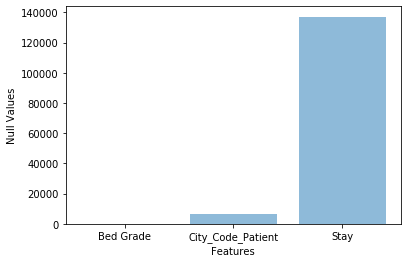

In [28]:
# graphically representing missing values
features=[]
null_values=[]

for col in data.columns:
    if data[col].isnull().sum() > 0:
        features.append(col)
        null_values.append(data[col].isnull().sum())
        

plt.bar(features, null_values, align= 'center', alpha= 0.5)
plt.xlabel('Features')
plt.ylabel('Null Values')
plt.show()
        
        


In [29]:
data.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

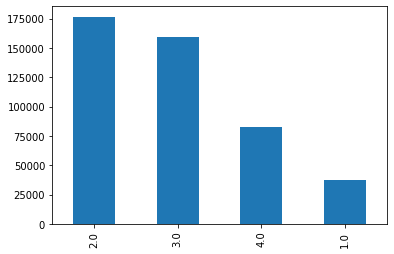

In [31]:
data['Bed Grade'].value_counts().plot(kind='bar')
#we will change bed grade to categorical feature
data['Bed Grade']= data['Bed Grade'].astype(object)

In [32]:
#we will replace nulls in Bed Grade with mode, which is 2
data['Bed Grade']= data['Bed Grade'].replace(np.nan, data['Bed Grade'].mode()[0])
data['Bed Grade']= data['Bed Grade'].astype(object)
data['Bed Grade'].isnull().sum()

0

In [33]:
data['City_Code_Patient']= data['City_Code_Patient'].replace(np.nan,data['City_Code_Patient'].mode()[0])
data['City_Code_Patient'].isnull().sum()

0

In [34]:
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

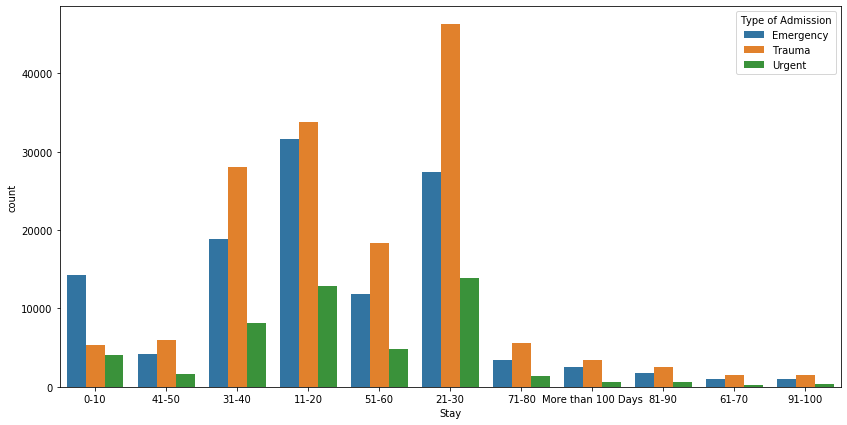

In [35]:
plt.figure(figsize=(14,7))
sns.countplot('Stay', hue= 'Type of Admission',data= train)

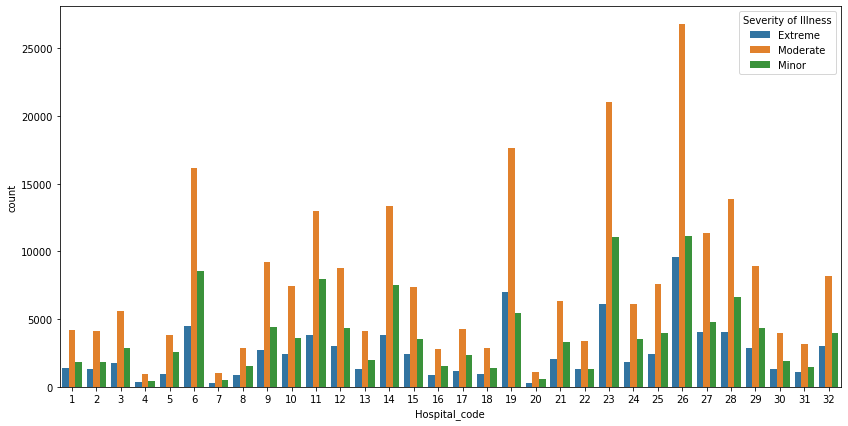

In [36]:
plt.figure(figsize=(14,7))
sns.countplot('Hospital_code', hue= 'Severity of Illness',data= data)

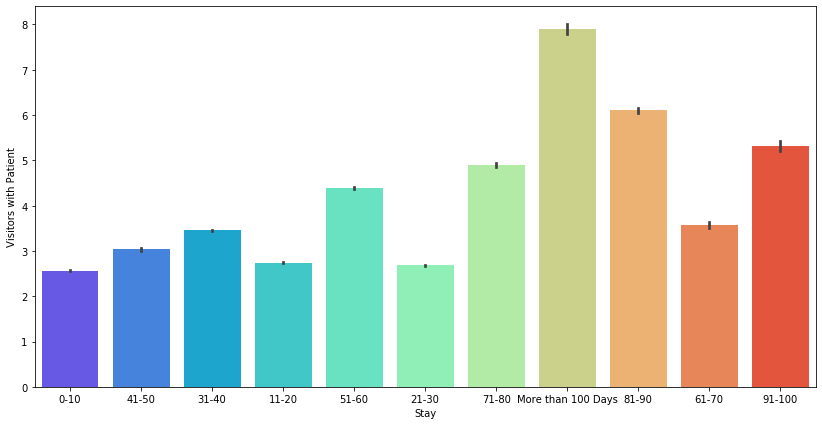

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x='Stay', y='Visitors with Patient', data= train, palette='rainbow')

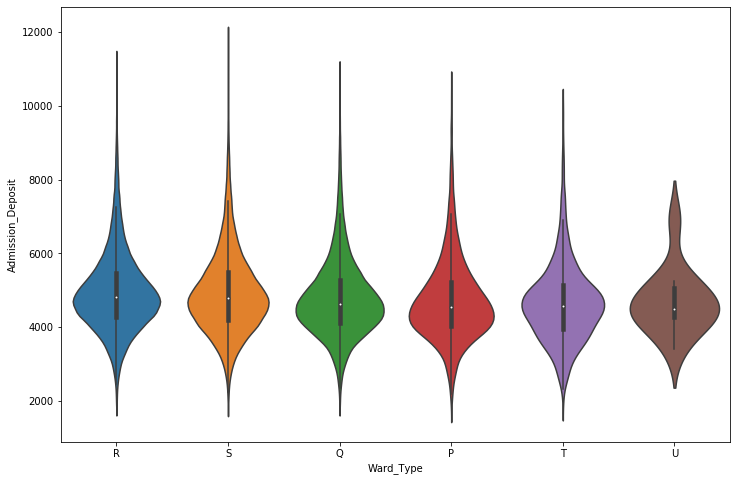

In [38]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'Ward_Type', y= 'Admission_Deposit', data= data)

In [39]:
catg= data.select_dtypes(include= ['object'])
print('object var: {}'.format(catg.shape[1]))

object var: 9


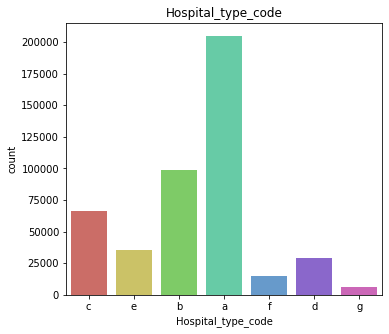

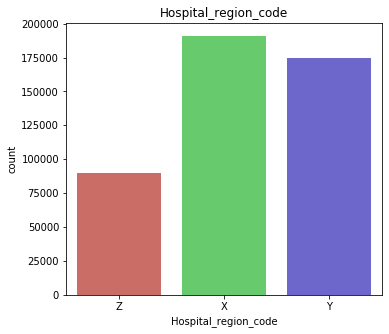

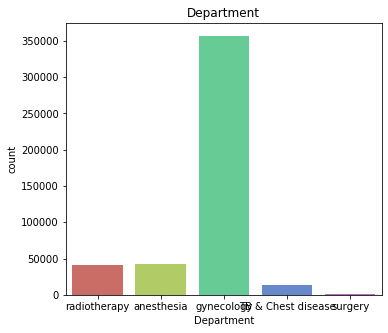

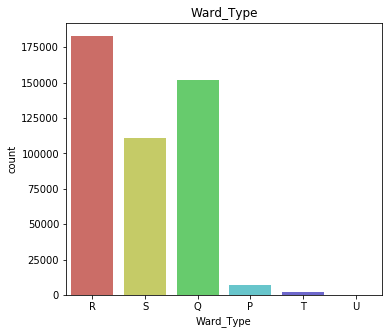

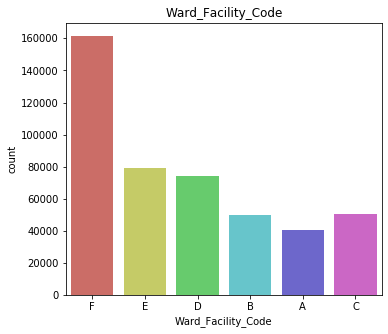

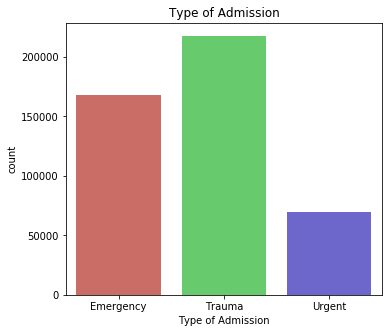

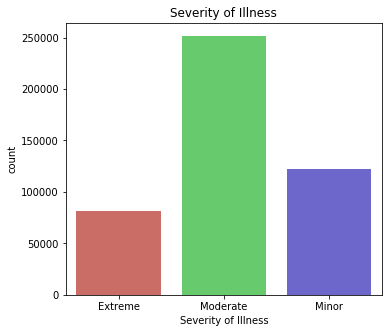

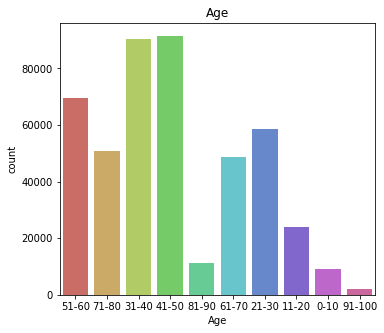

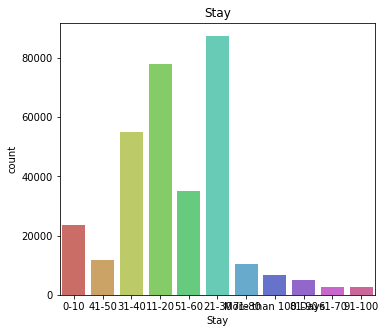

In [40]:
for i,col in enumerate(catg):
    plt.figure(figsize= (60,5))
    plt.subplot(1,catg.shape[1],i+1)
    sns.countplot(x= col, data= catg, palette= 'hls')
    plt.title(col)
    plt.show()

In [201]:
#data['Age'].replace({'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4,  '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9 },inplace= True)
print(data['Age'].unique())

[5 7 3 4 8 6 2 1 0 9]


In [41]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


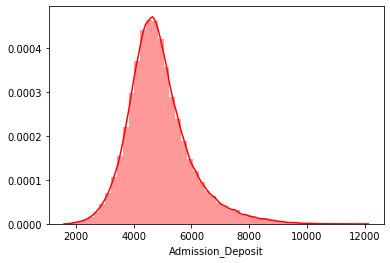

In [42]:
sns.distplot(data['Admission_Deposit'], color= 'red')

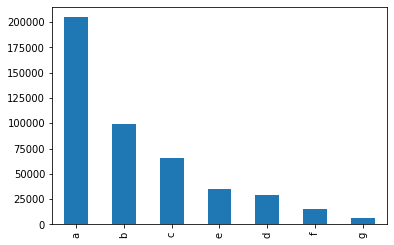

In [43]:
data['Hospital_type_code'].value_counts().plot(kind='bar')

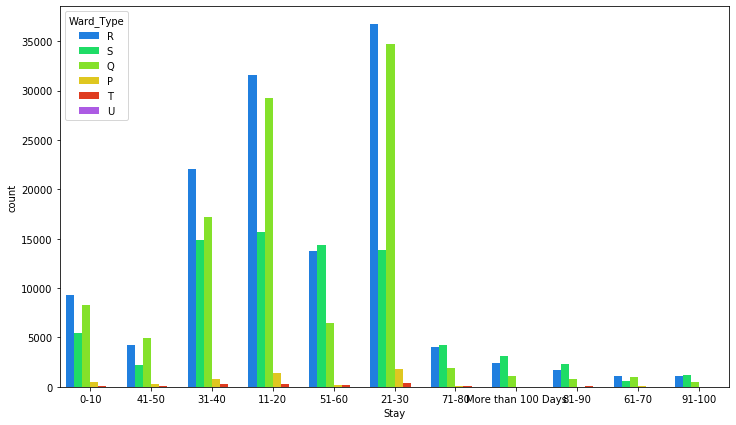

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(x= 'Stay', hue='Ward_Type', data= data, palette= 'gist_ncar' )

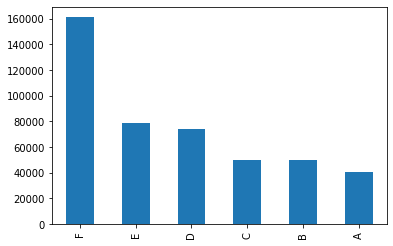

In [45]:
data['Ward_Facility_Code'].value_counts().plot(kind='bar')

In [210]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,patientid,City_Code_Patient,Type of Admission,Visitors with Patient,Age,Admission_Deposit,Stay,Bed_Grade,Severity_of_Illness
0,1,8,c,3,Z,3,radiotherapy,R,F,31397,7.0,2,2,5,4911.0,0-10,1,0
1,2,2,c,5,Z,2,radiotherapy,S,F,31397,7.0,3,2,5,5954.0,41-50,1,0
2,3,10,e,1,X,2,anesthesia,S,E,31397,7.0,3,2,5,4745.0,31-40,1,0
3,4,26,b,2,Y,2,radiotherapy,R,D,31397,7.0,3,2,5,7272.0,41-50,1,0
4,5,26,b,2,Y,2,radiotherapy,S,D,31397,7.0,3,2,5,5558.0,41-50,1,0


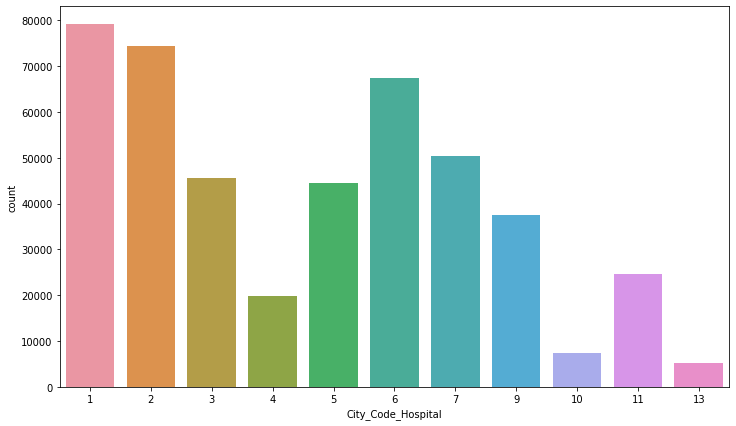

In [212]:
plt.figure(figsize=(12,7))
sns.countplot(x='Hospital_code', data= data )


In [47]:
data= data.drop(['City_Code_Hospital','patientid','case_id','City_Code_Patient','Hospital_code', 'Ward_Facility_Code',],axis=1)

In [51]:
data.dtypes

Hospital_type_code                    object
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Bed Grade                             object
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [49]:
df= data.copy()

In [52]:
def outlier1(*column):
    for i in column:
        q1,q3=np.percentile(df[i],[25,75])
        iqr=q3-q1
        lower_fence=q1-(1.5*iqr)
        upper_fence=q3+(1.5*iqr)
        df[i].clip(lower_fence,upper_fence,inplace=True)
        
outlier1('Admission_Deposit','Available Extra Rooms in Hospital','Visitors with Patient')
        

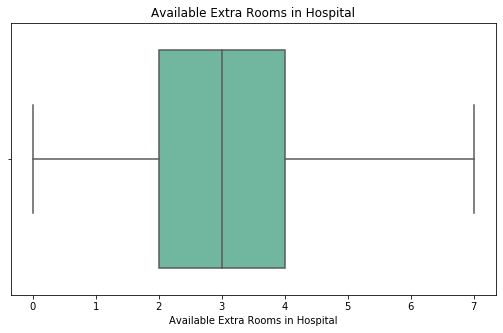

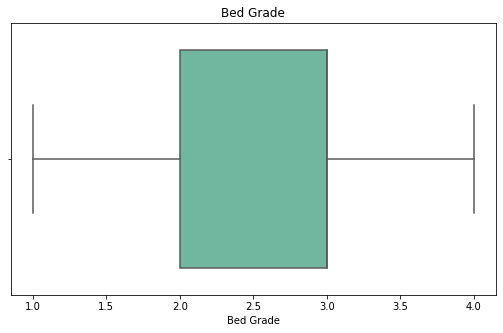

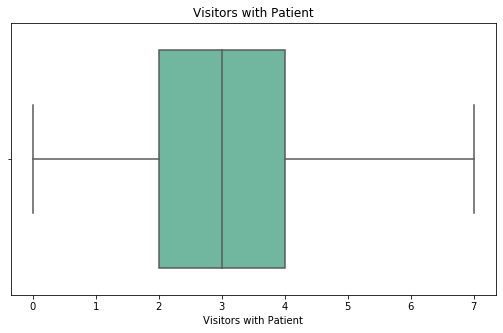

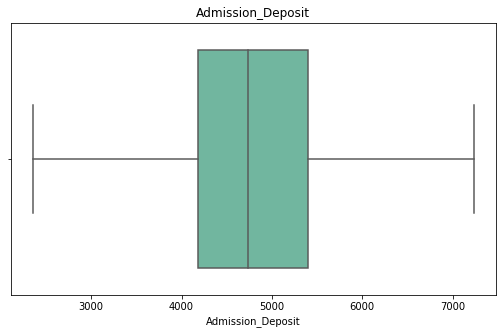

In [53]:
def checking_outlier(data):
    num= data.select_dtypes(include=[np.number])
    for i, col in enumerate(num):
        if col not in ['Bed_Grade', 'Severity_of_Illness']:
            plt.figure(figsize = (40,5))
            plt.subplot(1,num.shape[1],i+1)
            sns.boxplot(num[col], palette = 'BuGn')
            plt.title(col)
            plt.show()
            
checking_outlier(df)

In [55]:
#let us create dummy

dcol= ['Type of Admission','Severity of Illness','Bed Grade','Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Age']

df1= pd.get_dummies(df[dcol], drop_first= True)
#print(df1.head())

df= df.drop(['Type of Admission','Severity of Illness','Bed Grade','Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Age'], axis=1)
df1.head()

,Bed Grade,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_Y,Hospital_region_code_Z,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [56]:
#scaling numerical variable

scol= ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df[scol]= sc.fit_transform(df[scol])
df.head()


,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Stay
0,-0.166598,-0.862609,0.061936,0-10
1,-1.042387,-0.862609,1.106162,41-50
2,-1.042387,-0.862609,-0.104259,31-40
3,-1.042387,-0.862609,2.390169,41-50
4,-1.042387,-0.862609,0.709696,41-50


In [57]:
master= pd.concat([df,df1], axis=1)
master.head()


,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Stay,Bed Grade,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_Y,Hospital_region_code_Z,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,-0.166598,-0.862609,0.061936,0-10,2.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.042387,-0.862609,1.106162,41-50,2.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,-1.042387,-0.862609,-0.104259,31-40,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,-1.042387,-0.862609,2.390169,41-50,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.042387,-0.862609,0.709696,41-50,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [58]:
display('train' , train.shape, 'test', test.shape, 'master', master.shape) 

'train'

(318438, 18)

'test'

(137057, 17)

'master'

(455495, 35)

In [59]:
# separating train and test dataset
X_Train= master[:-137057].drop(['Stay'],axis=1)
Y_Train= master[:-137057]['Stay']
X_Test= master[-137057:].drop(['Stay'],axis=1)

display('train', X_Train.shape, 'Y_Train', Y_Train.shape, 'X_test', X_Test.shape)

'train'

(318438, 34)

'Y_Train'

(318438,)

'X_test'

(137057, 34)

In [60]:
#Splitting our dataset 
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split= train_test_split(X_Train,Y_Train, test_size=0.3, random_state=0)

x_train_split.head()

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Bed Grade,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_Y,Hospital_region_code_Z,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
116336,-1.042387,-0.862609,0.282195,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
120728,0.709191,-0.862609,0.581546,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
225510,3.336559,-0.141699,-1.321688,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
216349,0.709191,-0.141699,0.708695,3.0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
171646,0.709191,-0.862609,0.712700,3.0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
#LOGISTIC REGRESSION, ONE VERSUS REST
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
clf= OneVsRestClassifier(LR)
clf.fit(x_train_split,y_train_split)

OneVsRestClassifier(estimator=LogisticRegression())

In [67]:
y_pred_ovr= clf.predict(x_val_split)

In [68]:
accuracy_score(y_val_split, y_pred_ovr)

0.37532973244567264

In [62]:
#GRADIENT BOOST MODEL
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_model = GradientBoostingClassifier()

grad_boost_model.fit(x_train_split,y_train_split)

GradientBoostingClassifier()

In [63]:
y_pred= grad_boost_model.predict(x_val_split)

In [64]:
from sklearn.metrics import accuracy_score
ac= accuracy_score(y_val_split, y_pred)
ac

0.4048277017125152

In [69]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()

rf_model.fit(x_train_split,y_train_split)


RandomForestClassifier()

In [70]:
y_pred_rf= rf_model.predict(x_val_split)

In [71]:
accuracy_score(y_val_split, y_pred_rf)


0.33176317883013023